# Introduction

(Adapted from Pattis and interactivepython.org)

ICS-46 is concerned with studying the lower-level data structures that are used
in Python to represent lists/tuples, dicts, sets/frozensets, and other
not-built-into Python named data-types: stacks, queues, priority-queues, 
equivalence classes, and graphs. There are two primary components to all these
data-types: arrays (a simpler version of Python lists) and self-referential
data-structures. Linked lists are the simplest kind of self-referential
data-structures; trees (we will study binary search trees) are more complex
self-referential data-structures.
 
Languages like Java/C++ don't build-in most of Python's useful data-types, but
instead provide them in standard libraries, which are a bit more awkward to use
than these data-types in Python. These data-type libraries are built on arrays
and self-referential structures. This week is a peek at self-referential
structures: linked lists and binary search trees.

## Linear structures

We'll start by reviewing what linear structures are. So far you've seen lists, tuples and dictionaries. A data structure is linear when once the data goes in, is referenced by its position relative to other elements (technically dictionaries are not linear form the code side, but they are from the assembler's side). 

Linear structures can be thought of as having two ends. Sometimes these ends are referred to as the “left” and the “right” or in some cases the “front” and the “rear.” You could also call them the “top” and the “bottom.” The names given to the ends are not significant. What distinguishes one linear structure from another is the way in which items are added and removed, in particular the location where these additions and removals occur. For example, a structure might allow new items to be added at only one end. Some structures might allow items to be removed from either end.

## LIFO and FIFO

LIFO (Last In First Out) and FIFO (First in First Out) are two wasy to handle data structures. As the name says it, LIFO allows you to pop or access the last element that was inserted into the structure. FIFO on the other hand allows you to only pop the first one.

## Stack

A stack (sometimes called a “push-down stack”) is an ordered collection of items where the addition of new items and the removal of existing items always takes place at the same end. This end is commonly referred to as the “top.” The end opposite the top is known as the “base.”

The base of the stack is significant since items stored in the stack that are closer to the base represent those that have been in the stack the longest. The most recently added item is the one that is in position to be removed first. This ordering principle is sometimes called LIFO, last-in first-out. It provides an ordering based on length of time in the collection. Newer items are near the top, while older items are near the base
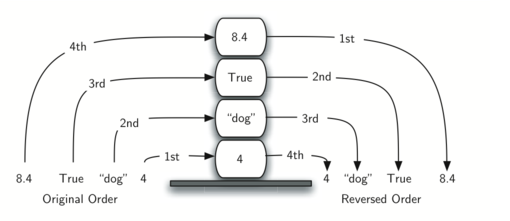
The stack abstract data type is defined by the following structure and operations. A stack is structured, as described above, as an ordered collection of items where items are added to and removed from the end called the “top.” Stacks are ordered LIFO. The stack operations are given below.

1. Stack() creates a new stack that is empty. It needs no parameters and returns an empty stack.
2. push(item) adds a new item to the top of the stack. It needs the item and returns nothing.
3. pop() removes the top item from the stack. It needs no parameters and returns the item. The stack is modified.
4. peek() returns the top item from the stack but does not remove it. It needs no parameters. The stack is not modified.
5. isEmpty() tests to see whether the stack is empty. It needs no parameters and returns a boolean value.
6. size() returns the number of items on the stack. It needs no parameters and returns an integer.


In [1]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)
        
s=Stack()

print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())


True
dog
3
False
8.4
True
2


It is important to note that we could have chosen to implement the stack using a list where the top is at the beginning instead of at the end. In this case, the previous pop and append methods would no longer work and we would have to index position 0 (the first item in the list) explicitly using pop and insert.

### Stack example: Converting decimal to binary

The following code converts a decimal number to binary using a stack. It pushes a 1 unto the stack if division by 2 leaves a reminder and 0 if it doesn't, and then divides the number until it gets to 0.

In [2]:
def divideBy2(decNumber):
    remstack = Stack()

    while decNumber > 0:
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2

    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())

    return binString

print(divideBy2(42))

101010


### Excercise

Modify the code so you can convert decimals to binary, octal and hex numbers

## Queue

A queue is an ordered collection of items where the addition of new items happens at one end, called the “rear,” and the removal of existing items occurs at the other end, commonly called the “front.” As an element enters the queue it starts at the rear and makes its way toward the front, waiting until that time when it is the next element to be removed. Queue uses a FIFO structure.
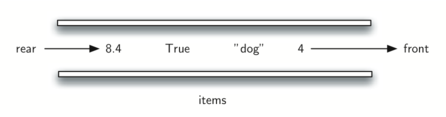

The queue abstract data type is defined by the following structure and operations. A queue is structured, as described above, as an ordered collection of items which are added at one end, called the “rear,” and removed from the other end, called the “front.” Queues maintain a FIFO ordering property. The queue operations are given below.

1. Queue() creates a new queue that is empty. It needs no parameters and returns an empty queue.

2. enqueue(item) adds a new item to the rear of the queue. It needs the item and returns nothing.

3. dequeue() removes the front item from the queue. It needs no parameters and returns the item. The queue is modified.

4. isEmpty() tests to see whether the queue is empty. It needs no parameters and returns a boolean value.

5. size() returns the number of items in the queue. It needs no parameters and returns an integer.

In [3]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)
q=Queue()
q.enqueue(4)
q.enqueue('dog')
q.enqueue(True)
print(q.size())
print(q.isEmpty())
q.enqueue(8.4)
print(q.dequeue())
print(q.dequeue())
q.size()

3
False
4
dog


2

### Queue example: Hot potato

In the game of hot potato a circle of people pass down an object. When the music stops, whoever has the object has to step out. Since we don't have a way to play music (yet) we are going to use a set number and a queue to simulate the circle.
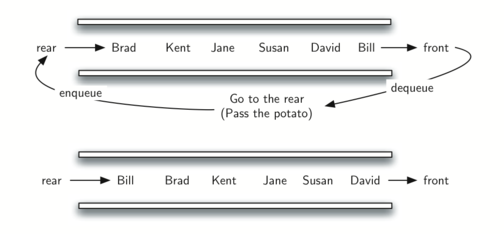

In [4]:
import random
def hotPotato(namelist, num):
    simqueue = Queue()
    for name in namelist:
        simqueue.enqueue(name)

    while simqueue.size() > 1:
        for i in range(num):
            simqueue.enqueue(simqueue.dequeue())

        simqueue.dequeue()

    return simqueue.dequeue()

print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],random.randint(1,7)))

Susan


## Deque (pronounced dek)

A deque, also known as a double-ended queue, is an ordered collection of items similar to the queue. It has two ends, a front and a rear, and the items remain positioned in the collection. What makes a deque different is the unrestrictive nature of adding and removing items. New items can be added at either the front or the rear. Likewise, existing items can be removed from either end. In a sense, this hybrid linear structure provides all the capabilities of stacks and queues in a single data structure.

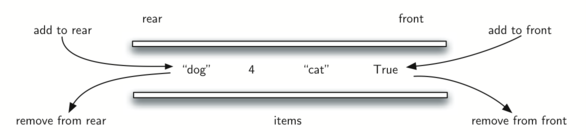

The deque abstract data type is defined by the following structure and operations. A deque is structured, as described above, as an ordered collection of items where items are added and removed from either end, either front or rear. The deque operations are given below.

1. Deque() creates a new deque that is empty. It needs no parameters and returns an empty deque.
2. addFront(item) adds a new item to the front of the deque. It needs the item and returns nothing.
3. addRear(item) adds a new item to the rear of the deque. It needs the item and returns nothing.
4. removeFront() removes the front item from the deque. It needs no parameters and returns the item. The deque is modified.
5. removeRear() removes the rear item from the deque. It needs no parameters and returns the item. The deque is modified.
6. isEmpty() tests to see whether the deque is empty. It needs no parameters and returns a boolean value.
7. size() returns the number of items in the deque. It needs no parameters and returns an integer.

In [5]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)
    
d=Deque()
print(d.isEmpty())
d.addRear(4)
d.addRear('dog')
d.addFront('cat')
d.addFront(True)
print(d.size())
print(d.isEmpty())
d.addRear(8.4)
print(d.removeRear())
print(d.removeFront())

True
4
False
8.4
True


### Deque example: Palindrome

We already did a palindrome project using list slicing. In this case we are going to use a deque. Since we can remove from both side we just keeep checking the left letter and the right letter and keep removing if they are equal.

In [6]:
def palchecker(aString):
    chardeque = Deque()

    for ch in aString:
        chardeque.addRear(ch)

    stillEqual = True

    while chardeque.size() > 1 and stillEqual:
        first = chardeque.removeFront()
        last = chardeque.removeRear()
        if first != last:
            stillEqual = False

    return stillEqual

print(palchecker("lsdkjfskf"))
print(palchecker("radar"))

False
True


## Lists

So far you know about python's lists. They store items in the order you specify them and they keep that order throughout the code. For the remainder of this documents these lists will be referenced as unordered lists, since they don't reorder the data but just keep whatever order (or lack of) that was there since it's declaration.

## Unordered Lists

Following is a decription of the methods an unordered lists may have. These may seem familiar because python's list type behaves like this.

1. List() creates a new list that is empty. It needs no parameters and returns an empty list.
2. add(item) adds a new item to the list. It needs the item and returns nothing. Assume the item is not already in the list.
3. remove(item) removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
4. search(item) searches for the item in the list. It needs the item and returns a boolean value.
5. isEmpty() tests to see whether the list is empty. It needs no parameters and returns a boolean value.
6. size() returns the number of items in the list. It needs no parameters and returns an integer.
7. append(item) adds a new item to the end of the list making it the last item in the collection. It needs the item and returns nothing. Assume the item is not already in the list.
8. index(item) returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
9. insert(pos,item) adds a new item to the list at position pos. It needs the item and returns nothing. Assume the item is not already in the list and there are enough existing items to have position pos.
10. pop() removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
11. pop(pos) removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

## Linked lists

Before we can go further with lists, we need to talk about a very important data structure that keeps everything together, and that is a Linked List. A linked list attaches a node to every element that is pointing to the next member of the list. This way the machine knows where to look for it in the systems memory. All lists including stacks and queues use this structure of a variation of it.
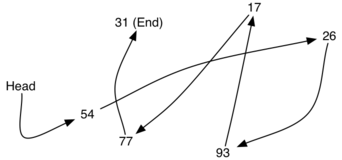

### The node class

Each node object must hold at least two pieces of information. First, the node must contain the list item itself. We will call this the data field of the node. In addition, each node must hold a reference to the next node. To construct a node, you need to supply the initial data value for the node.

In [7]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext
temp = Node(93)
temp.getData()

93

The special Python reference value None will play an important role in the Node class and later in the linked list itself. A reference to None will denote the fact that there is no next node. Note in the constructor that a node is initially created with next set to None. Since this is sometimes referred to as “grounding the node,” we will use the standard ground symbol to denote a reference that is referring to None. It is always a good idea to explicitly assign None to your initial next reference values.
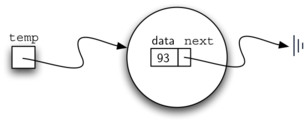

### The Unordered List class

An unordered list is just a collection of nodes. We just need to fin the first node and follow the path from there. Let's look at each of the UnorderedList methods in detail

In [8]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count
    
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found
    
    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
    
    
mylist = UnorderedList()

First, mylist is empty. The head of the list refers to the first node. 
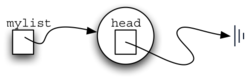

#### Isempty()

The isEmpty() method checks to see if the head of the list is a reference to None, if so then it returns true.

In [9]:
print (mylist.isEmpty())

True


#### Add()

So, how do we get items into our list? We need to implement the add method. However, before we can do that, we need to address the important question of where in the linked list to place the new item. Since this list is unordered, the specific location of the new item with respect to the other items already in the list is not important. The new item can go anywhere. With that in mind, it makes sense to place the new item in the easiest location possible.

Recall that the linked list structure provides us with only one entry point, the head of the list. All of the other nodes can only be reached by accessing the first node and then following next links. This means that the easiest place to add the new node is right at the head, or beginning, of the list. In other words, we will make the new item the first item of the list and the existing items will need to be linked to this new first item so that they follow.

In [10]:
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

Note that since 31 is the first item added to the list, it will eventually be the last node on the linked list as every other item is added ahead of it. Also, since 54 is the last item added, it will become the data value in the first node of the linked list.
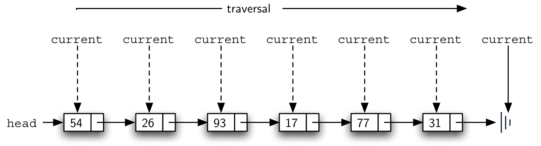

### Linked traversal

The next methods that we will implement–size, search, and remove–are all based on a technique known as linked list traversal. Traversal refers to the process of systematically visiting each node. To do this we use an external reference that starts at the first node in the list. As we visit each node, we move the reference to the next node by “traversing” the next reference

#### size()

To implement the size method, we need to traverse the linked list and keep a count of the number of nodes that occurred. The external reference is called current and is initialized to the head of the list in line 2. At the start of the process we have not seen any nodes so the count is set to 0. Lines 4–6 actually implement the traversal. As long as the current reference has not seen the end of the list (None), we move current along to the next node via the assignment statement in line 6. Again, the ability to compare a reference to None is very useful. Every time current moves to a new node, we add 1 to count. Finally, count gets returned after the iteration stops. 
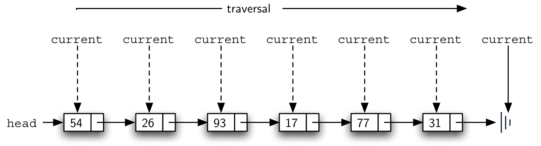

In [11]:
print(mylist.size())

6


#### Search()

Searching for a value in a linked list implementation of an unordered list also uses the traversal technique. As we visit each node in the linked list we will ask whether the data stored there matches the item we are looking for. In this case, however, we may not have to traverse all the way to the end of the list. In fact, if we do get to the end of the list, that means that the item we are looking for must not be present. Also, if we do find the item, there is no need to continue.
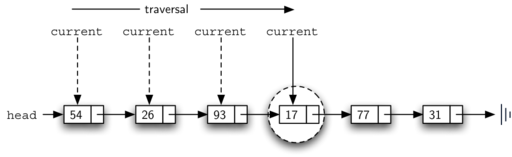

In [12]:
mylist.search(17)

True

#### Remove()


The remove method requires two logical steps. First, we need to traverse the list looking for the item we want to remove. Once we find the item (recall that we assume it is present), we must remove it. The first step is very similar to search. Starting with an external reference set to the head of the list, we traverse the links until we discover the item we are looking for. Since we assume that item is present, we know that the iteration will stop before current gets to None. This means that we can simply use the boolean found in the condition.

When found becomes True, current will be a reference to the node containing the item to be removed. But how do we remove it? One possibility would be to replace the value of the item with some marker that suggests that the item is no longer present. The problem with this approach is the number of nodes will no longer match the number of items. It would be much better to remove the item by removing the entire node.

In order to remove the node containing the item, we need to modify the link in the previous node so that it refers to the node that comes after current. Unfortunately, there is no way to go backward in the linked list. Since current refers to the node ahead of the node where we would like to make the change, it is too late to make the necessary modification.

The solution to this dilemma is to use two external references as we traverse down the linked list. current will behave just as it did before, marking the current location of the traverse. The new reference, which we will call previous, will always travel one node behind current. That way, when current stops at the node to be removed, previous will be referring to the proper place in the linked list for the modification.

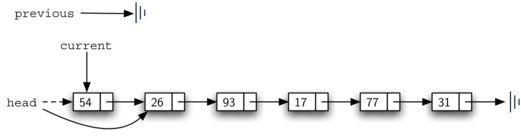

Once the searching step of the remove has been completed, we need to remove the node from the linked list. However, there is a special case that needs to be addressed. If the item to be removed happens to be the first item in the list, then current will reference the first node in the linked list. This also means that previous will be None. We said earlier that previous would be referring to the node whose next reference needs to be modified in order to complete the remove. In this case, it is not previous but rather the head of the list that needs to be changed 
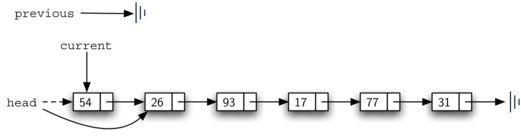

In [13]:
mylist.remove(17)

### Excercise

We haven't implemented append, insert, index and pop. Plus, our list is not iterable. Modify unordered list to be iterable and to implement these methods.

### Ordered list

Son now that we learned how to build an unordered list using nodes, we are going to look into ordered lists. 

The structure of an ordered list is a collection of items where each item holds a relative position that is based upon some underlying characteristic of the item. The ordering is typically either ascending or descending and we assume that list items have a meaningful comparison operation that is already defined. Many of the ordered list operations are the same as those of the unordered list.

1. OrderedList() creates a new ordered list that is empty. It needs no parameters and returns an empty list.
2. add(item) adds a new item to the list making sure that the order is preserved. It needs the item and returns nothing. Assume the item is not already in the list.
3. remove(item) removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
4. search(item) searches for the item in the list. It needs the item and returns a boolean value.
5. isEmpty() tests to see whether the list is empty. It needs no parameters and returns a boolean value.
6. size() returns the number of items in the list. It needs no parameters and returns an integer.
7. index(item) returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
8. pop() removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
9. pop(pos) removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

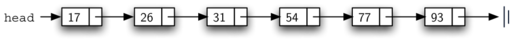

To implement the OrderedList class, we will use the same technique as seen previously with unordered lists. Once again, an empty list will be denoted by a head reference to None

In [14]:
class OrderedList:
    def __init__(self):
        self.head = None

    def search(self,item):
        current = self.head
        found = False
        stop = False
        while current != None and not found and not stop:
            if current.getData() == item:
                found = True
            else:
                if current.getData() > item:
                    stop = True
                else:
                    current = current.getNext()

        return found

    def add(self,item):
        current = self.head
        previous = None
        stop = False
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()

        temp = Node(item)
        if previous == None:
            temp.setNext(self.head)
            self.head = temp
        else:
            temp.setNext(current)
            previous.setNext(temp)

    def isEmpty(self):
        return self.head == None

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count


#### Search()

As we consider the operations for the ordered list, we should note that the isEmpty and size methods can be implemented the same as with unordered lists since they deal only with the number of nodes in the list without regard to the actual item values. Likewise, the remove method will work just fine since we still need to find the item and then link around the node to remove it. The two remaining methods, search and add, will require some modification.

The search of an unordered linked list required that we traverse the nodes one at a time until we either find the item we are looking for or run out of nodes (None). It turns out that the same approach would actually work with the ordered list and in fact in the case where we find the item it is exactly what we need. However, in the case where the item is not in the list, we can take advantage of the ordering to stop the search as soon as possible.

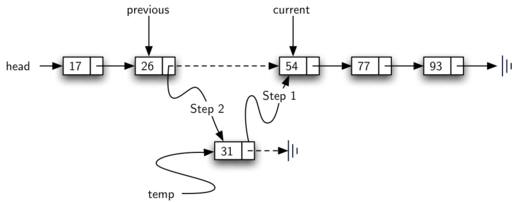

#### Add()

The most significant method modification will take place in add. Recall that for unordered lists, the add method could simply place a new node at the head of the list. It was the easiest point of access. Unfortunately, this will no longer work with ordered lists. It is now necessary that we discover the specific place where a new item belongs in the existing ordered list.

Assume we have the ordered list consisting of 17, 26, 54, 77, and 93 and we want to add the value 31. The add method must decide that the new item belongs between 26 and 54. As we explained earlier, we need to traverse the linked list looking for the place where the new node will be added. We know we have found that place when either we run out of nodes (current becomes None) or the value of the current node becomes greater than the item we wish to add. In our example, seeing the value 54 causes us to stop.

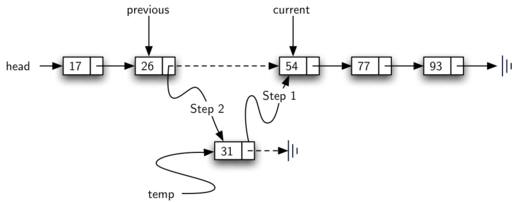

As we saw with unordered lists, it is necessary to have an additional reference, again called previous, since current will not provide access to the node that must be modified.

In [15]:
mylist = OrderedList()
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))


6
True
False


### Excercise

The linked list implementation given above is called a singly linked list because each node has a single reference to the next node in sequence. An alternative implementation is known as a doubly linked list. In this implementation, each node has a reference to the next node (commonly called next) as well as a reference to the preceding node (commonly called back). The head reference also contains two references, one to the first node in the linked list and one to the last. Code this implementation in Python.

# Interlude

While you might be thinking, why do I need to know about stacks, queues and linked lists if I can just use Python bult ins?, there are several answers for that:

1. While we use Python as our programming language, this is in the end a programming course and not a python course. That being said, there are programming languages that require you to understand and implement these data structures

2. A good handman can only work with the tools in the toolset. Adding datastructures to yours allows you to be more versatile and shows that you are a professional.

3. For some problems it is better to use data structures different than built in ones. For example, ordered lists are the inputs for many important optimization algorithms.

4. It is good to know how Python works behind curtains.

Now, if you think linked lists are hard, trees are going to be a little complicated. For now we are going to work with binary trees, but trees are to lists what two dimensional figures are to lines

## Tree structures and tree algorithms

Trees are used in many areas of computer science, including operating systems, graphics, database systems, and computer networking. Tree data structures have many things in common with their botanical cousins. A tree data structure has a root, branches, and leaves. The difference between a tree in nature and a tree in computer science is that a tree data structure has its root at the top and its leaves on the bottom.

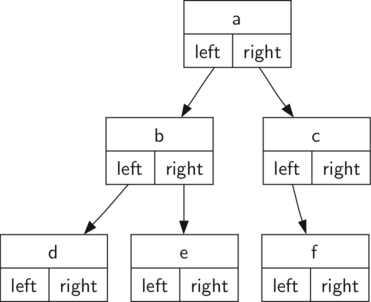

Notice that you can start at the top of the tree and follow a path made of circles and arrows all the way to the bottom. At each level of the tree we might ask ourselves a question and then follow the path that agrees with our answer. For example we might ask, “Is this animal a Chordate or an Arthropod?” If the answer is “Chordate” then we follow that path and ask, “Is this Chordate a Mammal?” If not, we are stuck (but only in this simplified example). When we are at the Mammal level we ask, “Is this Mammal a Primate or a Carnivore?” We can keep following paths until we get to the very bottom of the tree where we have the common name.

A second property of trees is that all of the children of one node are independent of the children of another node. For example, the Genus Felis has the children Domestica and Leo. The Genus Musca also has a child named Domestica, but it is a different node and is independent of the Domestica child of Felis. This means that we can change the node that is the child of Musca without affecting the child of Felis.

A third property is that each leaf node is unique. We can specify a path from the root of the tree to a leaf that uniquely identifies each species in the animal kingdom; for example, Animalia → Chordate → Mammal → Carnivora → Felidae → Felis → Domestica.

File systems also use a tree-like structure. A path such as C:User\Bob\Desktop is a path through that tree. We will not go into multipath trees for now but just stick to binary ones where each node points to two more.

### Vocabulary

Before we continue unto the implementation of a tree, we need to learn a little bit about the tree's vocabulary:
1. Node
A node is a fundamental part of a tree. It can have a name, which we call the “key.” A node may also have additional information. We call this additional information the “payload.” While the payload information is not central to many tree algorithms, it is often critical in applications that make use of trees.
2. Edge
An edge is another fundamental part of a tree. An edge connects two nodes to show that there is a relationship between them. Every node (except the root) is connected by exactly one incoming edge from another node. Each node may have several outgoing edges.
3. Root
The root of the tree is the only node in the tree that has no incoming edges. 
4. Path
A path is an ordered list of nodes that are connected by edges. 
5. Children
The set of nodes c that have incoming edges from the same node to are said to be the children of that node. 
6. Parent
A node is the parent of all the nodes it connects to with outgoing edges. 
7. Sibling
Nodes in the tree that are children of the same parent are said to be siblings. The nodes etc/ and usr/ are siblings in the filesystem tree.
8. Subtree
A subtree is a set of nodes and edges comprised of a parent and all the descendants of that parent.
9. Leaf Node
A leaf node is a node that has no children. 
10. Level
The level of a node n is the number of edges on the path from the root node to n. For example, the level of the Felis node in Figure 1 is five. By definition, the level of the root node is zero.
11. Height
The height of a tree is equal to the maximum level of any node in the tree. 

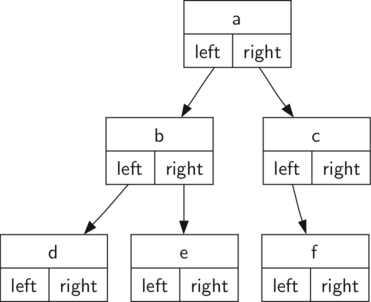

There are two common ways to represent a tree data structure. One is to use list of lists, where the deeper you go on the list the lower the level of the tree. For example: 

myTree = ['a',   #root

      ['b',  #left subtree
       ['d', [], []],
       ['e', [], []] ],
      ['c',  #right subtree
       ['f', [], []],
       [] ]
     ] 
Represents the following structure:
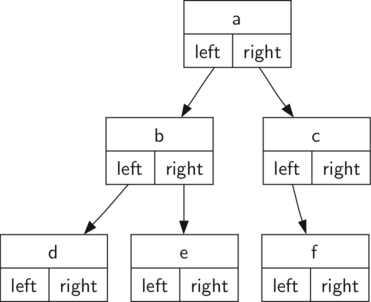

But this type of representation, while easy to understand, is oftentimes messy and suboptimal. Instead we will build upon the concept of linked lists where each node will point to one parent and two children:

### Trees with nodes

We will define a class that has attributes for the root value, as well as the left and right subtrees. Since this representation more closely follows the object-oriented programming paradigm, we will continue to use this representation for the remainder of the chapter.

In [16]:
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key


Notice the constructor function expects to get some kind of object to store in the root. Just like you can store any object you like in a list, the root object of a tree can be a reference to any object. For our early examples, we will store the name of the node as the root value. 

#### InsertLeft()

To add a left child to the tree, we will create a new binary tree object and set the left attribute of the root to refer to this new object. 

We must consider two cases for insertion. The first case is characterized by a node with no existing left child. When there is no left child, simply add a node to the tree. The second case is characterized by a node with an existing left child. In the second case, we insert a node and push the existing child down one level in the tree. The second case is handled by the else statement.

#### InsertRight()

The code for insertRight must consider a symmetric set of cases. There will either be no right child, or we must insert the node between the root and an existing right child.

To round out the definition for a simple binary tree data structure, we will write accessor methods for the left and right children, as well as the root values.

The tree works as follows:

In [17]:
r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())

a
None
b
c
hello


### Excercise

Build the following tree:
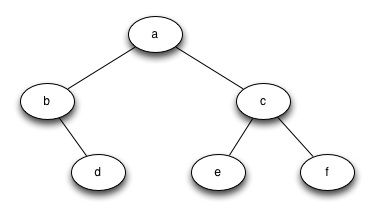

### Tree traversals

Just as with linear structures, we need to learn how to traverse a tree using a visit pattern. We'll look into three different traversals:

1. preorder
In a preorder traversal, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree.
2. inorder
In an inorder traversal, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.
3. postorder
In a postorder traversal, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.

#### Preorder

The following function shows a version of the preorder traversal written as an external function that takes a binary tree as a parameter. The external function is particularly elegant because our base case is simply to check if the tree exists. If the tree parameter is None, then the function returns without taking any action.

In [20]:
def preorder(tree):
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())
print (preorder(r))

a
b
hello
None


#### Postorder

The algorithm for the postorder traversal, is nearly identical to preorder except that we move the call to print to the end of the function.

In [21]:
def postorder(tree):
    if tree != None:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())
print(postorder(r))

b
hello
a
None


#### InOrder

If we perform a simple inorder traversal of a parse tree we get our original expression back, without any parentheses. Let’s modify the basic inorder algorithm to allow us to recover the fully parenthesized version of the expression. The only modifications we will make to the basic template are as follows: print a left parenthesis before the recursive call to the left subtree, and print a right parenthesis after the recursive call to the right subtree.

In [22]:
#### Simple version

def inorder(tree):
  if tree != None:
      inorder(tree.getLeftChild())
      print(tree.getRootVal())
      inorder(tree.getRightChild())
print(inorder(r))

b
a
hello
None


In [23]:
#### Elegant version

def printexp(tree):
  sVal = ""
  if tree:
      sVal = '(' + printexp(tree.getLeftChild())
      sVal = sVal + str(tree.getRootVal())
      sVal = sVal + printexp(tree.getRightChild())+')'
  return sVal

printexp(r)

'((b)a(hello))'

Notice that the printexp function as we have implemented it puts parentheses around each number. While not incorrect, the parentheses are clearly not needed.

### Excercise

Modify inorder, preorder and printexp so that instead of printing the values, it returns a list of lists representation of the tree.

## Binary search tree (BST)

So now that we have implemented a binary tree, we are going to implement a BST which is an important data structure for search algorithms. There are many algorithms to efficiently search through large trees, we will look into some of them and algorithms that apply only to balanced trees.

For this we'll be using the map logic as we learned in functional programming, where the map object will correlate values to keys. Our whole search will be guided by a map. The operations of our search function are the following:

1. Map() Create a new, empty map.
2. put(key,val) Add a new key-value pair to the map. If the key is already in the map then replace the old value with the new value.
3. get(key) Given a key, return the value stored in the map or None otherwise.
4. del Delete the key-value pair from the map using a statement of the form del map[key].
5. len() Return the number of key-value pairs stored in the map.
6. in Return True for a statement of the form key in map, if the given key is in the map.

A binary search tree relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree. We will call this the bst property. As we implement the Map interface as described above, the bst property will guide our implementation.

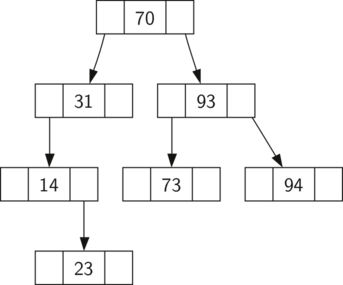

To implement the binary search tree, we will use the nodes and references approach similar to the one we used to implement the linked list, and the expression tree. However, because we must be able create and work with a binary search tree that is empty, our implementation will use two classes. The first class we will call BinarySearchTree, and the second class we will call TreeNode. The BinarySearchTree class has a reference to the TreeNode that is the root of the binary search tree. In most cases the external methods defined in the outer class simply check to see if the tree is empty. If there are nodes in the tree, the request is just passed on to a private method defined in the BinarySearchTree class that takes the root as a parameter. In the case where the tree is empty or we want to delete the key at the root of the tree, we must take special action. 

In [26]:
class BinarySearchTree:

    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def put(self,key,val):
        if self.root:
            self._put(key,val,self.root)
        else:
            self.root = TreeNode(key,val)
        self.size = self.size + 1

    def _put(self,key,val,currentNode):
        if key < currentNode.key:
            if currentNode.hasLeftChild():
                   self._put(key,val,currentNode.leftChild)
            else:
                   currentNode.leftChild = TreeNode(key,val,parent=currentNode)
        else:
            if currentNode.hasRightChild():
                   self._put(key,val,currentNode.rightChild)
            else:
                   currentNode.rightChild = TreeNode(key,val,parent=currentNode)

    def __setitem__(self,k,v):
       self.put(k,v)

    def get(self,key):
       if self.root:
           res = self._get(key,self.root)
           if res:
                  return res.payload
           else:
                  return None
       else:
           return None

    def _get(self,key,currentNode):
       if not currentNode:
           return None
       elif currentNode.key == key:
           return currentNode
       elif key < currentNode.key:
           return self._get(key,currentNode.leftChild)
       else:
           return self._get(key,currentNode.rightChild)

    def __getitem__(self,key):
       return self.get(key)

    def __contains__(self,key):
       if self._get(key,self.root):
           return True
       else:
           return False

    def delete(self,key):
      if self.size > 1:
         nodeToRemove = self._get(key,self.root)
         if nodeToRemove:
             self.remove(nodeToRemove)
             self.size = self.size-1
         else:
             raise KeyError('Error, key not in tree')
      elif self.size == 1 and self.root.key == key:
         self.root = None
         self.size = self.size - 1
      else:
         raise KeyError('Error, key not in tree')

    def __delitem__(self,key):
       self.delete(key)

    def spliceOut(self):
       if self.isLeaf():
           if self.isLeftChild():
                  self.parent.leftChild = None
           else:
                  self.parent.rightChild = None
       elif self.hasAnyChildren():
           if self.hasLeftChild():
                  if self.isLeftChild():
                     self.parent.leftChild = self.leftChild
                  else:
                     self.parent.rightChild = self.leftChild
                  self.leftChild.parent = self.parent
           else:
                  if self.isLeftChild():
                     self.parent.leftChild = self.rightChild
                  else:
                     self.parent.rightChild = self.rightChild
                  self.rightChild.parent = self.parent

    def findSuccessor(self):
      succ = None
      if self.hasRightChild():
          succ = self.rightChild.findMin()
      else:
          if self.parent:
                 if self.isLeftChild():
                     succ = self.parent
                 else:
                     self.parent.rightChild = None
                     succ = self.parent.findSuccessor()
                     self.parent.rightChild = self
      return succ

    def findMin(self):
      current = self
      while current.hasLeftChild():
          current = current.leftChild
      return current

    def remove(self,currentNode):
         if currentNode.isLeaf(): #leaf
           if currentNode == currentNode.parent.leftChild:
               currentNode.parent.leftChild = None
           else:
               currentNode.parent.rightChild = None
         elif currentNode.hasBothChildren(): #interior
           succ = currentNode.findSuccessor()
           succ.spliceOut()
           currentNode.key = succ.key
           currentNode.payload = succ.payload

         else: # this node has one child
           if currentNode.hasLeftChild():
             if currentNode.isLeftChild():
                 currentNode.leftChild.parent = currentNode.parent
                 currentNode.parent.leftChild = currentNode.leftChild
             elif currentNode.isRightChild():
                 currentNode.leftChild.parent = currentNode.parent
                 currentNode.parent.rightChild = currentNode.leftChild
             else:
                 currentNode.replaceNodeData(currentNode.leftChild.key,
                                    currentNode.leftChild.payload,
                                    currentNode.leftChild.leftChild,
                                    currentNode.leftChild.rightChild)
           else:
             if currentNode.isLeftChild():
                 currentNode.rightChild.parent = currentNode.parent
                 currentNode.parent.leftChild = currentNode.rightChild
             elif currentNode.isRightChild():
                 currentNode.rightChild.parent = currentNode.parent
                 currentNode.parent.rightChild = currentNode.rightChild
             else:
                 currentNode.replaceNodeData(currentNode.rightChild.key,
                                    currentNode.rightChild.payload,
                                    currentNode.rightChild.leftChild,
                                    currentNode.rightChild.rightChild)
    def __iter__(self):
        if self:
            if self.hasLeftChild(): 
                for elem in self.leftChiLd:
                    yield elem
            yield self.key
            if self.hasRightChild():
                for elem in self.rightChild:
                    yield elem

In [27]:
class TreeNode:
    def __init__(self,key,val,left=None,right=None,parent=None):
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return self.rightChild or self.leftChild

    def hasBothChildren(self):
        return self.rightChild and self.leftChild

    def replaceNodeData(self,key,value,lc,rc):
        self.key = key
        self.payload = value
        self.leftChild = lc
        self.rightChild = rc
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self

Let's go step by step.

### BinaryTree

The BinaryTree class is what gives us the structure of the tree while the TreeNode will work as our interface for our search. The first methods are pretty trivial, builts a binary tree and sets normal data structure behavior such as pop, queue, etc. After that the first method to analyze is:

#### Put()

The put method is a method of the BinarySearchTree class. This method will check to see if the tree already has a root. If there is not a root then put will create a new TreeNode and install it as the root of the tree. If a root node is already in place then put calls the private, recursive, helper function _put to search the tree according to the following algorithm:

1. Starting at the root of the tree, search the binary tree comparing the new key to the key in the current node. If the new key is less than the current node, search the left subtree. If the new key is greater than the current node, search the right subtree.
2. When there is no left (or right) child to search, we have found the position in the tree where the new node should be installed.
3. To add a node to the tree, create a new TreeNode object and insert the object at the point discovered in the previous step.
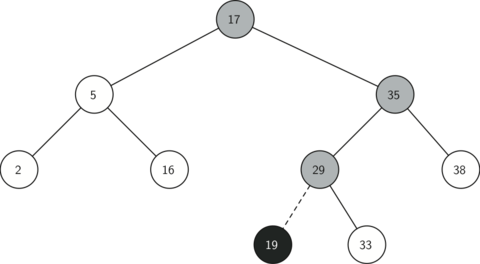

With the put method defined, we can easily overload the [] operator for assignment by having the __setitem__ method call the put method. This allows us to write Python statements like myZipTree['Plymouth'] = 55446, just like a Python dictionary.

#### Get()

Once the tree is constructed, the next task is to implement the retrieval of a value for a given key. The get method is even easier than the put method because it simply searches the tree recursively until it gets to a non-matching leaf node or finds a matching key. When a matching key is found, the value stored in the payload of the node is returned.

By implementing the __getitem__ method we can write a Python statement that looks just like we are accessing a dictionary, when in fact we are using a binary search tree, for example z = myZipTree['Fargo']. As you can see, all the __getitem__ method does is call get.

#### Contains()

Using get, we can implement the in operation by writing a __contains__ method for the BinarySearchTree. The __contains__ method will simply call get and return True if get returns a value, or False if it returns None.

#### Del()

Finally, we turn our attention to the most challenging method in the binary search tree, the deletion of a key. The first task is to find the node to delete by searching the tree. If the tree has more than one node we search using the _get method to find the TreeNode that needs to be removed. If the tree only has a single node, that means we are removing the root of the tree, but we still must check to make sure the key of the root matches the key that is to be deleted. In either case if the key is not found the del operator raises an error.

Once we’ve found the node containing the key we want to delete, there are three cases that we must consider:

The node to be deleted has no children.

The node to be deleted has only one child .

The node to be deleted has two children .


The first case is straightforward. If the current node has no children all we need to do is delete the node and remove the reference to this node in the parent. The code for this case is shown in here.
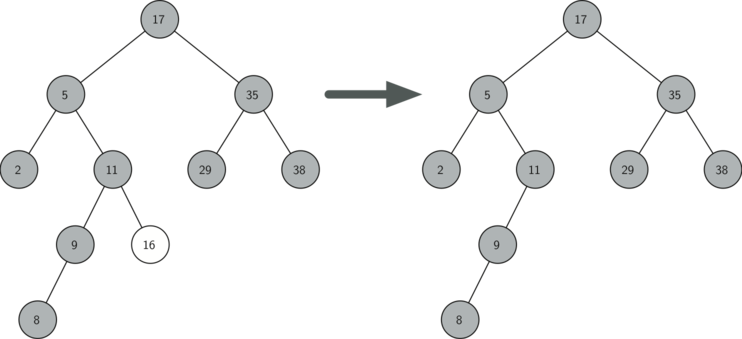

The second case is only slightly more complicated. If a node has only a single child, then we can simply promote the child to take the place of its parent. The code for this case is shown in the next listing. As you look at this code you will see that there are six cases to consider. Since the cases are symmetric with respect to either having a left or right child we will just discuss the case where the current node has a left child. The decision proceeds as follows:

1. If the current node is a left child then we only need to update the parent reference of the left child to point to the parent of the current node, and then update the left child reference of the parent to point to the current node’s left child.
2. If the current node is a right child then we only need to update the parent reference of the left child to point to the parent of the current node, and then update the right child reference of the parent to point to the current node’s left child.
3. If the current node has no parent, it must be the root. In this case we will just replace the key, payload, leftChild, and rightChild data by calling the replaceNodeData method on the root.

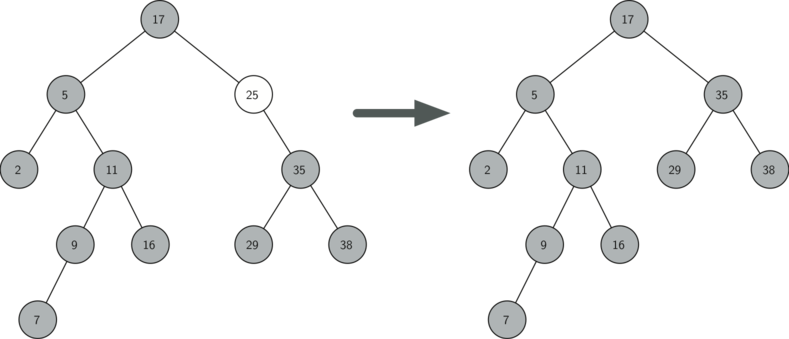

The third case is the most difficult case to handle. If a node has two children, then it is unlikely that we can simply promote one of them to take the node’s place. We can, however, search the tree for a node that can be used to replace the one scheduled for deletion. What we need is a node that will preserve the binary search tree relationships for both of the existing left and right subtrees. The node that will do this is the node that has the next-largest key in the tree. We call this node the successor, and we will look at a way to find the successor shortly. The successor is guaranteed to have no more than one child, so we know how to remove it using the two cases for deletion that we have already implemented. Once the successor has been removed, we simply put it in the tree in place of the node to be deleted.
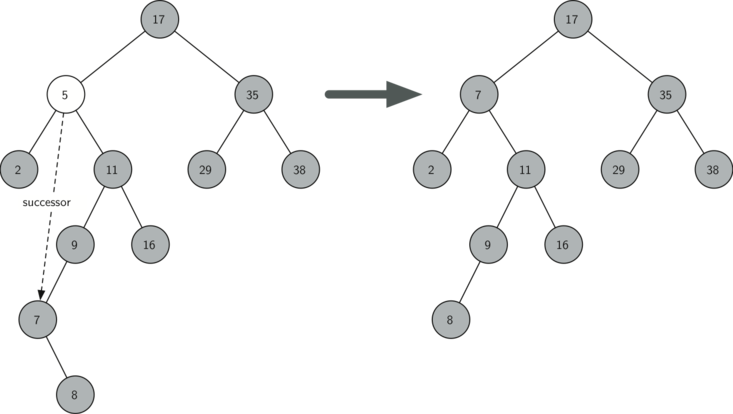

The code to find the successor is shown below and as you can see is a method of the TreeNode class. This code makes use of the same properties of binary search trees that cause an inorder traversal to print out the nodes in the tree from smallest to largest. There are three cases to consider when looking for the successor:

If the node has a right child, then the successor is the smallest key in the right subtree.
If the node has no right child and is the left child of its parent, then the parent is the successor.
If the node is the right child of its parent, and itself has no right child, then the successor to this node is the successor of its parent, excluding this node.
The first condition is the only one that matters for us when deleting a node from a binary search tree. However, the findSuccessor method has other uses that we will explore in the exercises at the end of this chapter.

The findMin method is called to find the minimum key in a subtree. You should convince yourself that the minimum valued key in any binary search tree is the leftmost child of the tree. Therefore the findMin method simply follows the leftChild references in each node of the subtree until it reaches a node that does not have a left child.



We need to look at one last interface method for the binary search tree. Suppose that we would like to simply iterate over all the keys in the tree in order. This is definitely something we have done with dictionaries, so why not trees? You already know how to traverse a binary tree in order, using the inorder traversal algorithm. However, writing an iterator requires a bit more work, since an iterator should return only one node each time the iterator is called.

Python provides us with a very powerful function to use when creating an iterator. The function is called yield. yield is similar to return in that it returns a value to the caller. However, yield also takes the additional step of freezing the state of the function so that the next time the function is called it continues executing from the exact point it left off earlier. Functions that create objects that can be iterated are called generator functions.

The code for an inorder iterator of a binary tree is shown in the next listing. Look at this code carefully; at first glance you might think that the code is not recursive. However, remember that __iter__ overrides the for x in operation for iteration, so it really is recursive! Because it is recursive over TreeNode instances the __iter__ method is defined in the TreeNode class.

## Conclussion

This is it for data structure. We could delve more into the details but you will just get confused as these topics will be revisited iin future courses. For now just practice with these implementations and learn them by heart. Many algorithms are better approached using data structures that are not built in in Python.